In [1]:
import pandas as pd
import numpy as np
import matplotlib as mplot
import seaborn as sb
from sklearn.feature_extraction.text import CountVectorizer

# EDA for Users.csv

In [7]:
users_data=pd.read_csv('users.csv')

In [8]:
users_data.shape

(6040, 5)

In [9]:
users_data.head(10)

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1.1,10,48067
1,2,M,56.0,16,70072
2,3,M,25.0,15,55117
3,4,M,45.0,7,02460
4,5,M,25.0,20,55455
5,6,F,50.0,9,55117
6,7,M,35.0,1,06810
7,8,M,25.0,12,11413
8,9,M,25.0,17,61614
9,10,F,35.0,1,95370


In [10]:
print('Total number of users- ',users_data.shape[0])

Total number of users-  6040


In [17]:
f,ax = mplot.subplots(figsize=(7, 3)),sb.countplot(y="Gender", data=users_data)

AttributeError: module 'matplotlib' has no attribute 'subplots'

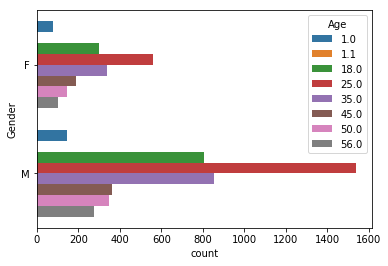

In [12]:
ax = sb.countplot(y="Gender", hue="Age", data=users_data)

# EDA for Movies.csv

In [36]:
movies_data=pd.read_csv("movies.csv")

In [37]:
movies_data.shape

(3882, 3)

In [38]:
movies_data.columns

Index(['MovieID', 'Title', 'Genres'], dtype='object')

In [39]:
movies_data.head()

,MovieID,Title,Genres
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


In [29]:
movies_data=movies_data.drop('Unnamed: 0',1)

In [30]:
movies_data.head()

,MovieID,Title,Genres
0,2,Jumanji (1995),Adventure|Children's|Fantasy
1,3,Grumpier Old Men (1995),Comedy|Romance
2,4,Waiting to Exhale (1995),Comedy|Drama
3,5,Father of the Bride Part II (1995),Comedy
4,6,Heat (1995),Action|Crime|Thriller


In [32]:
movies_data.to_csv("movies.csv",index=True)

In [40]:
vectorizer=CountVectorizer()
genres=vectorizer.fit_transform(movies_data['Genres'])

In [41]:
genres.shape

(3882, 20)

MovieID                                                  203
Title      To Wong Foo, Thanks for Everything! Julie Newm...
Genres                                                Comedy
Name: 200, dtype: object